In [53]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [54]:
from llm_faithfulness.experiment import get_experiment_from_file

single_rule_experiments = {
    "def_in_text": get_experiment_from_file("def_in_text"),
    "end_each_word_with_est": get_experiment_from_file("end_each_word_with_est"),
    "end_each_word_with_vowel": get_experiment_from_file("end_each_word_with_vowel"),
    "end_with_world": get_experiment_from_file("end_with_world"),
    "lowercase": get_experiment_from_file("lowercase"),
    "no_spaces": get_experiment_from_file("no_spaces"),
    "start_with_3": get_experiment_from_file("start_with_3"),
    "start_with_hello": get_experiment_from_file("start_with_hello"),
    "string_is_palindrome": get_experiment_from_file("string_is_palindrome"),
    "string_is_uuid": get_experiment_from_file("string_is_uuid"),
    "uppercase": get_experiment_from_file("uppercase"),
}

In [55]:
import hashlib
import colorsys
import matplotlib.pyplot as plt
import itertools

base_palettes = [
    plt.get_cmap('tab20').colors,
    plt.get_cmap('tab20b').colors,
    plt.get_cmap('tab20c').colors,
]
PALETTE = list(itertools.chain.from_iterable(base_palettes))


def hash_color(name: str) -> tuple:
    """
    Deterministically pick one of the PALETTE colors based on the rule name.
    If >60 unique rules, colors will repeat but still stay far apart in hue.
    """
    idx = int(hashlib.sha1(name.encode()).hexdigest(), 16) % len(PALETTE)
    return PALETTE[idx]


def lighten(rgb, t=0.45):
    r, g, b = rgb
    return ( (1-t)*r + t, (1-t)*g + t, (1-t)*b + t )

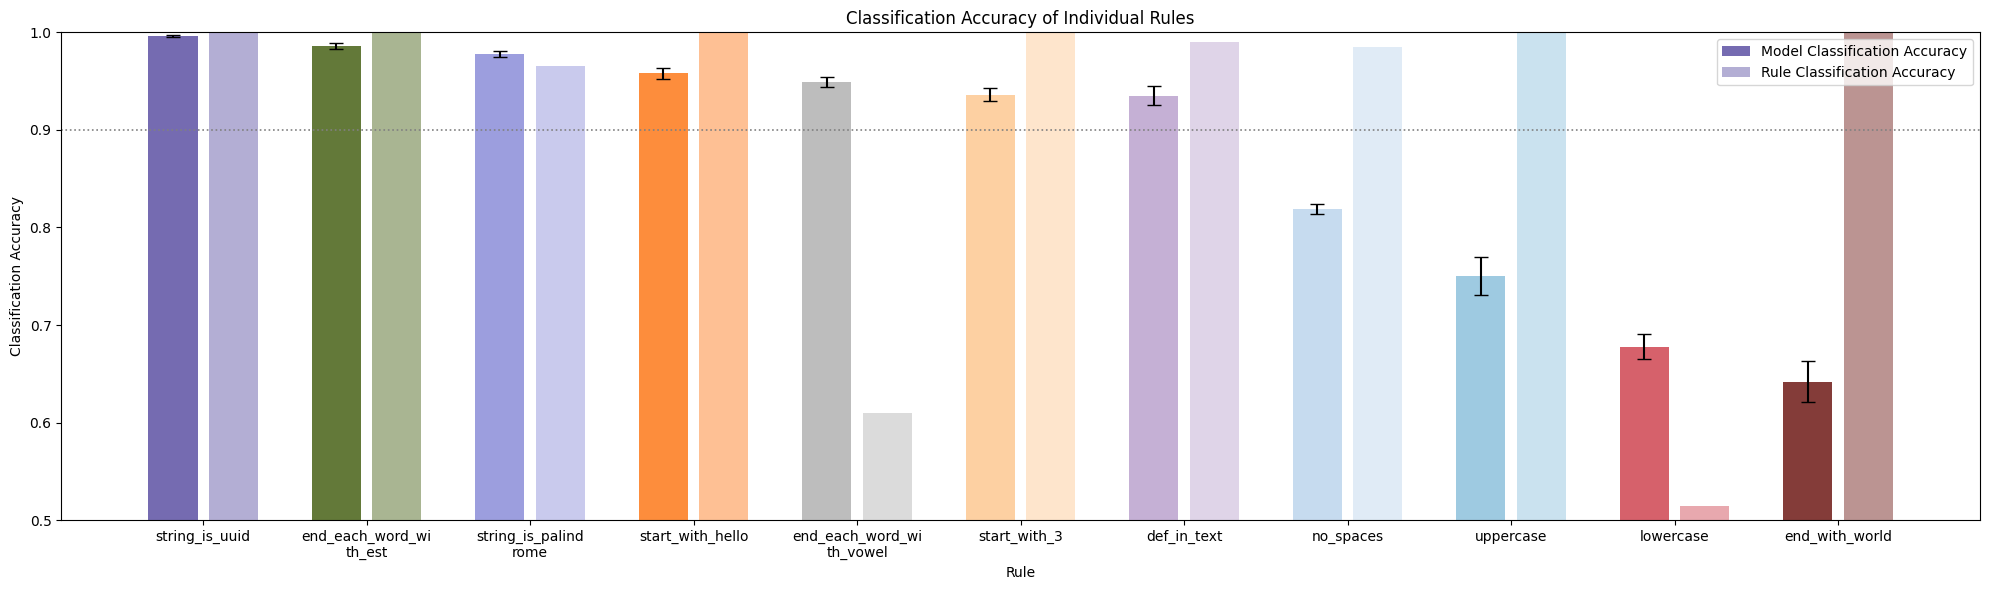

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import math

categories = list(single_rule_experiments.keys())
values  = [exp.acc_mean for exp in single_rule_experiments.values()]
values2 = [max(exp.rule_acc if exp.rule_acc else [0]) for exp in single_rule_experiments.values()]
sem     = [exp.acc_std / math.sqrt(len(exp.acc)) for exp in single_rule_experiments.values()]

sorted_idx = np.argsort(values)[::-1]
categories = [categories[i] for i in sorted_idx]
values     = [values[i]     for i in sorted_idx]
values2    = [values2[i]    for i in sorted_idx]
sem        = [sem[i]        for i in sorted_idx]

base_colors  = [hash_color(c) for c in categories]
light_colors = [lighten(c)    for c in base_colors]

x = np.arange(len(categories))
width = 0.3
gap   = 0.07

fig_width = max(20, len(categories) * 0.7)
fig, ax = plt.subplots(figsize=(fig_width, 6))

ax.bar(x - (width/2 + gap/2), values,  width, yerr=sem, capsize=5,
       color=base_colors,  label='Model Classification Accuracy')
ax.bar(x + (width/2 + gap/2), values2, width,            capsize=5,
       color=light_colors, label='Rule Classification Accuracy')

ax.axhline(0.9, linestyle=':', linewidth=1.2, color='gray')
ax.set_ylim(0.5, 1)

wrap12 = lambda s: "\n".join(s[i:i+16] for i in range(0, len(s), 16))
ax.set_xticks(x)
ax.set_xticklabels([wrap12(c) for c in categories], ha='center')

ax.set_xlabel('Rule')
ax.set_ylabel('Classification Accuracy')
ax.set_title('Classification Accuracy of Individual Rules')
ax.legend()
plt.tight_layout()
plt.show()


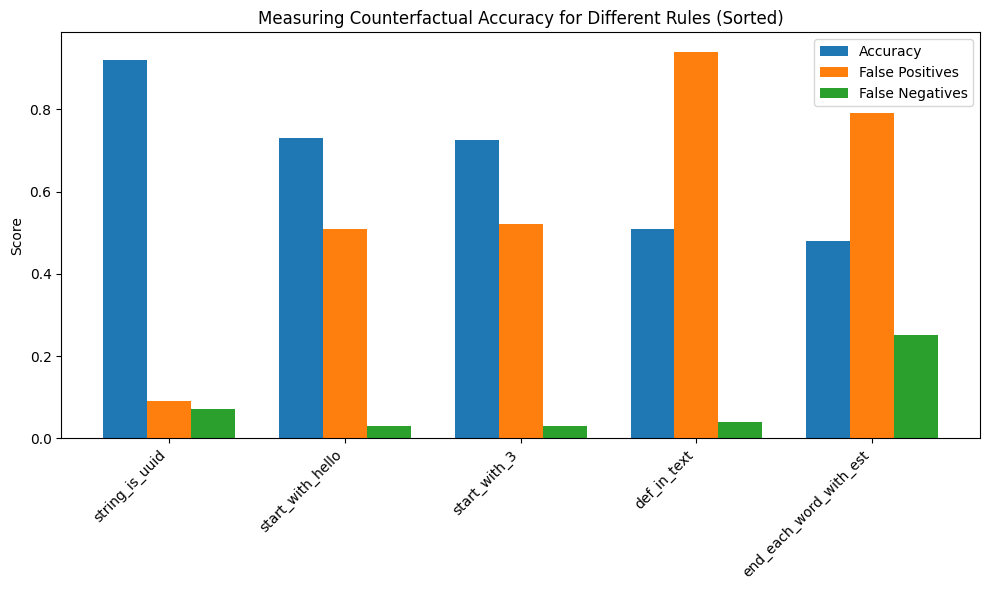

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Original data
categories = ["start_with_hello", "def_in_text", "end_each_word_with_est", "start_with_3", "string_is_uuid"]
accuracy = np.array([0.73, 0.51, 0.48, 0.725, 0.9187817258883249])
false_positive = np.array([0.51, 0.94, 0.79, 0.52, 0.09])
false_negative = np.array([0.03, 0.04, 0.25, 0.03, 0.07216494845360824])

# Sort by accuracy descending
idx_sorted = np.argsort(-accuracy)
categories_sorted = [categories[i] for i in idx_sorted]
accuracy_sorted = accuracy[idx_sorted]
fp_sorted = false_positive[idx_sorted]
fn_sorted = false_negative[idx_sorted]

# Bar positions
x = np.arange(len(categories_sorted))
width = 0.25

# Create the bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width, accuracy_sorted, width, label='Accuracy')
ax.bar(x, fp_sorted, width, label='False Positives')
ax.bar(x + width, fn_sorted, width, label='False Negatives')

# Customize the chart
ax.set_ylabel('Score')
ax.set_title('Measuring Counterfactual Accuracy for Different Rules (Sorted)')
ax.set_xticks(x)
ax.set_xticklabels(categories_sorted, rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.show()
